# transaction_new

#### 라이브러리

In [2]:
# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
plt.rc('font', family='NanumSquareNeo/TTF')
import seaborn as sns
from datetime import datetime

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import re

#### 필요함수 구현

In [3]:
# 데이터타입 변환
def columns_datetype_change(data,columns, datetype):
    data[columns] = data[columns].astype(datetype)
    if datetype == 'datetime64':
        data[columns] = data[columns].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S')).astype('datetime64[ns]')

# 결측값 확인
def null_check(data):
    return (data.isnull().sum() / data.shape[0]) * 100

# 데이터 info
def data_info(data):
    display(data.head(5),data.info())

# 정수형, 실수형을 제외한 나머지 데이터타입의 유니크값
def colmuns_unique(data):
    for c in data.columns:
        if data[c].dtype not in ['int64', 'float64']:
            print(f'------------{c}------------')
            print(data[f'{c}'].unique())
            
def memory_small(data):
    for c in data.columns:
        if data[c].dtype == 'int64':
            data[c] = data[c].astype('int32')
        elif data[c].dtype == 'object' and data[c].nunique()<10:
            data[c] = data[c].astype('category')
        

#### 데이터 불러오기

In [4]:
transaction_new =  pd.read_csv('data_file/transaction_new.csv')

#### transaction_new 분석

In [6]:
data_info(transaction_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753,55220,1,198753


None

In [7]:
# 데이터타입 변환  
columns_datetype_change(transaction_new,'created_at','datetime64')
columns_datetype_change(transaction_new,'shipment_date_limit','datetime64')

In [8]:
# 결측치확인
null_check(transaction_new)

created_at                0.00
customer_id               0.00
booking_id                0.00
session_id                0.00
payment_method            0.00
payment_status            0.00
promo_amount              0.00
promo_code               61.65
shipment_fee              0.00
shipment_date_limit       0.00
shipment_location_lat     0.00
shipment_location_long    0.00
total_amount              0.00
product_id                0.00
quantity                  0.00
item_price                0.00
dtype: float64

In [9]:
transaction_new.loc[transaction_new['promo_code'].isnull(),'promo_code']='Nopromo'

🅱️ 현재 promo_code 결측치 핸들링하는데, 현재 총합에서 (수량 * 제품값 + 배송비 - 할인가)를 뺐을때 값이 맞지 않다.
결론적으로 같은 날짜, 시간에 주문한 고객의 값이 합산되어 각 행에 입력되어 있다. 
아래 내용을 보면 수량x제품가격의 합을 모두 합산하고 배송비 10000원 더해주면 총합이 나온다.

🅱️ 회의를 통해 해당 데이터의 nan값을 대체하거나 삭제하지 않고 그대로 진행.


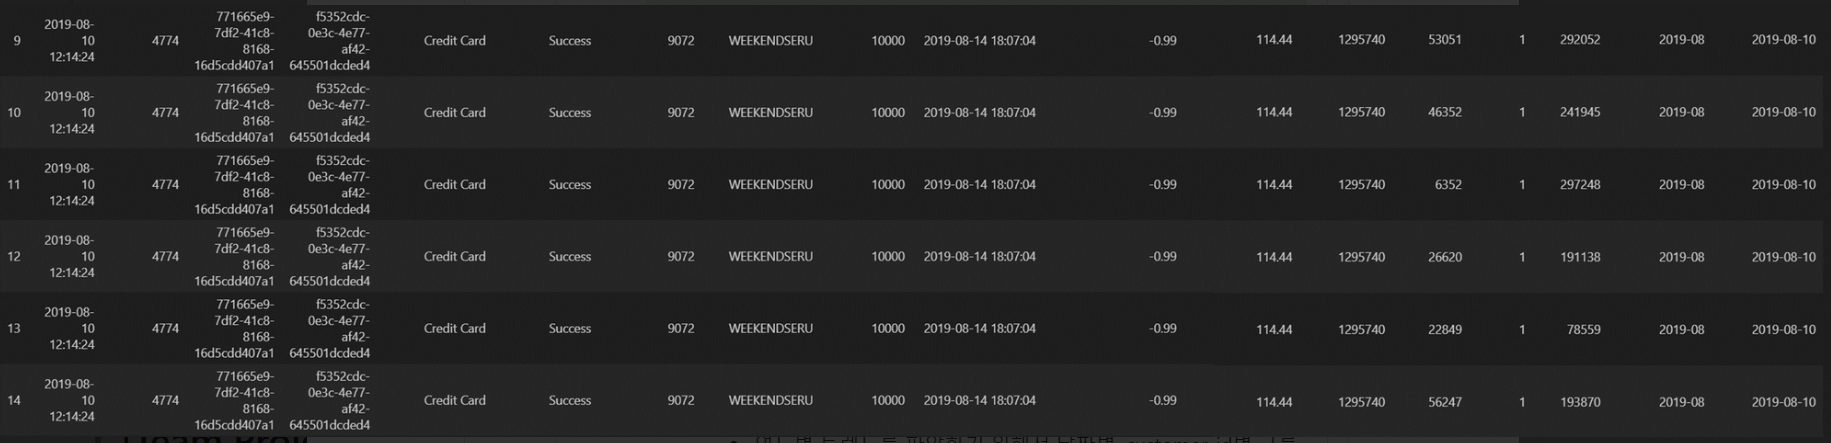

#### created_at  

In [11]:
transaction_new.created_at.dt.year.unique()

array([2018, 2019, 2020, 2021, 2022, 2017, 2016], dtype=int64)

<AxesSubplot:xlabel='created_at'>

findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.


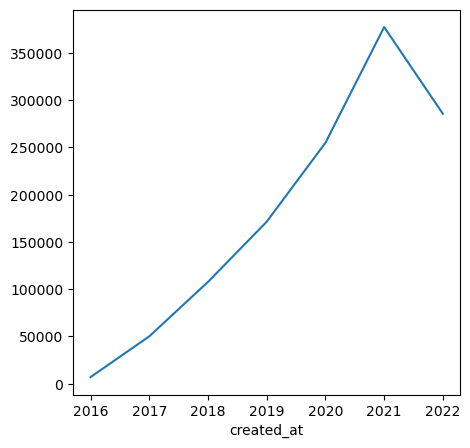

In [12]:
plt.subplots(figsize=(5,5))
transaction_new.groupby(transaction_new.created_at.dt.year).count()['session_id'].plot.line()

In [13]:
# yyyy-mm-dd형식으로 변경.
transaction_new['created_at_new2'] = transaction_new['created_at'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d')).astype('datetime64')

<AxesSubplot:xlabel='created_at_new2,created_at_new2'>

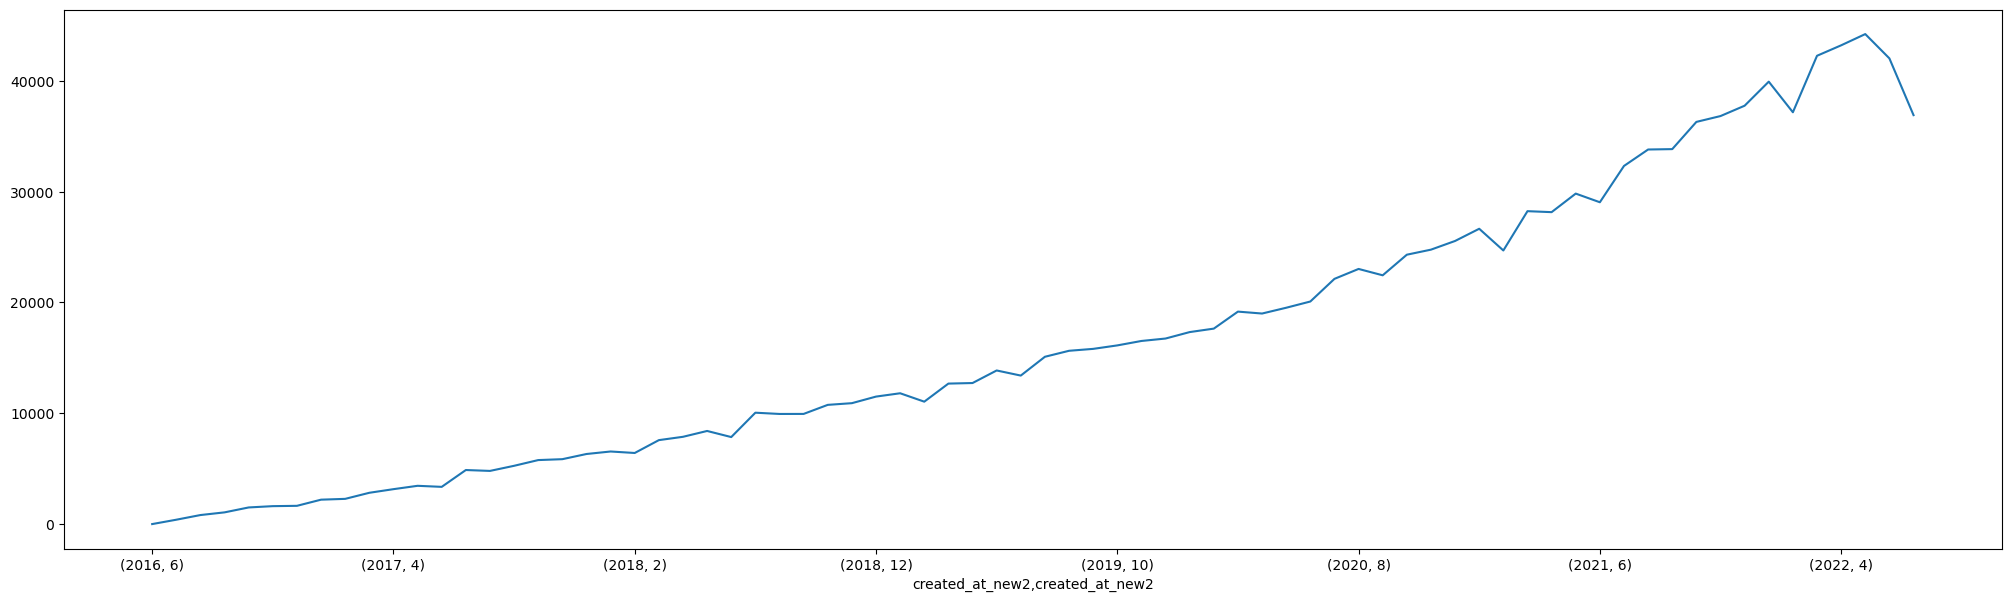

In [14]:
plt.subplots(figsize=(25,7))
col = transaction_new['created_at_new2'].dt
transaction_new_year = transaction_new.groupby([col.year, col.month])['customer_id'].count()
transaction_new_year.plot.line()

In [15]:
# shipment_date_limit - created_at (배송제한 날짜 - 주문날짜 = 배송기간)
transaction_new['shipment_period'] = (transaction_new['shipment_date_limit']-transaction_new['created_at']).dt.days

🅱️ 연도별로 주문량을 파악했을땐 2021년에 감소한다. 하지만 이건 2022년은 1-7월 주문량만 있고 2021년 주문량이 더 많기 때문에 당연히 감소하는 현상이다.   
🅱️ 연도별, 월별로 파악했을땐 월마다 하락되는 구간이 있다.

#### payment_method

<AxesSubplot:xlabel='promo_code', ylabel='count'>

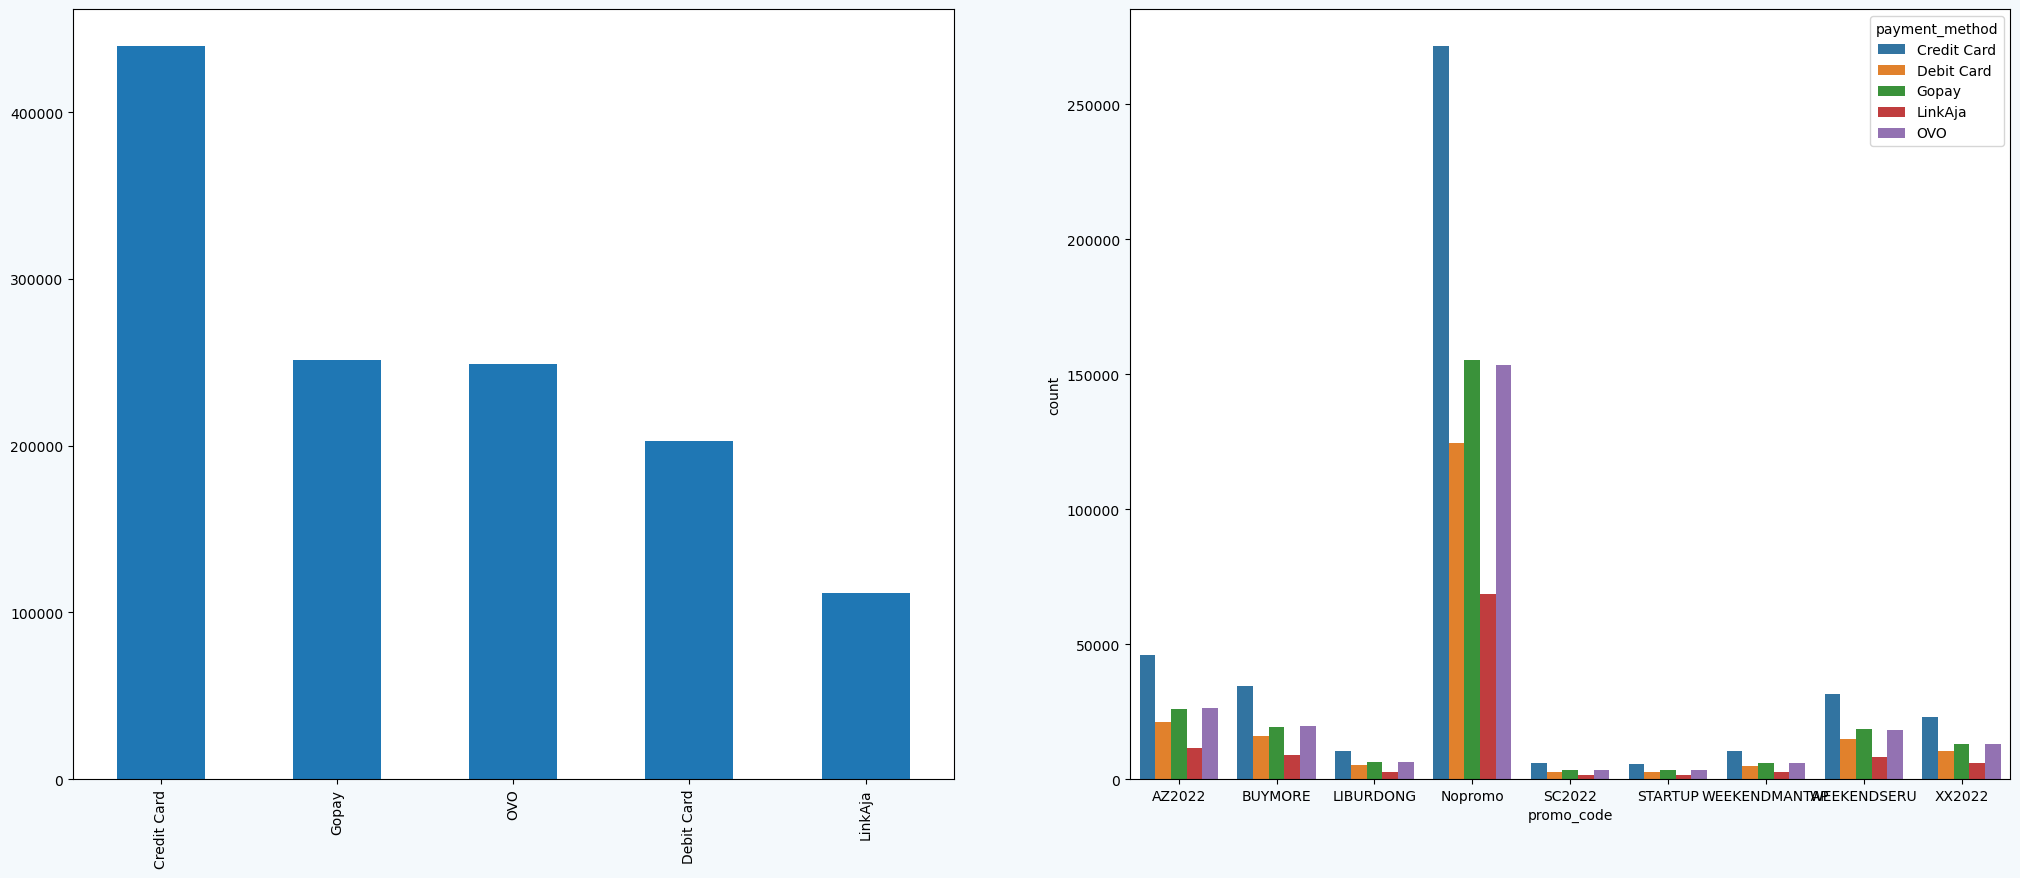

In [16]:
fig, axes = plt.subplots(1,2, figsize=(25, 10), facecolor='#F4F9FC')

# 지불방식 분포
transaction_new.payment_method.value_counts().plot.bar(ax=axes[0])

# 프로모션별 지불방식 분포
sns.countplot(data=transaction_new, x='promo_code', hue='payment_method',ax=axes[1])

🅱️ 결제방식은 신용카드가 가장 많다.
🅱️ 프로모션별 결제방식은 모든 같은 추이다. 신용카드가 가장 많다.

#### payment_status

Success   0.96
Failed    0.04
Name: payment_status, dtype: float64


<AxesSubplot:xlabel='promo_code', ylabel='count'>

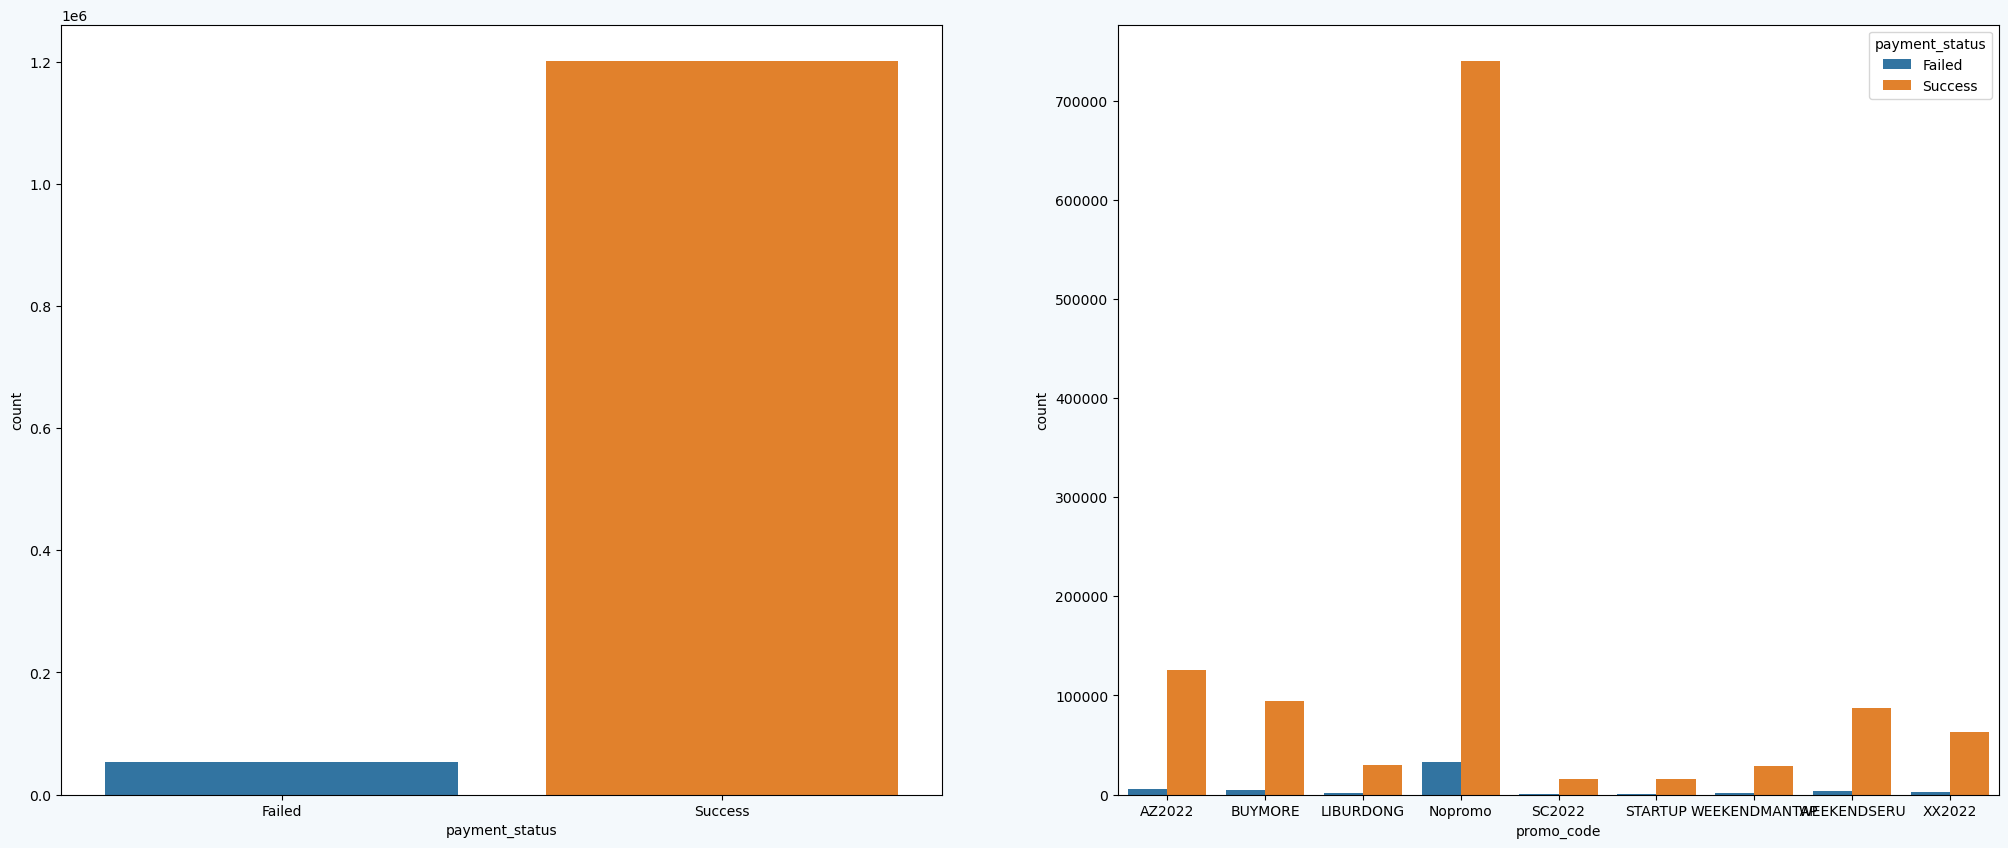

In [17]:
fig, axes = plt.subplots(1,2, figsize=(25, 10), facecolor='#F4F9FC')

# 결제성공여부
sns.countplot(x='payment_status',data=transaction_new, ax=axes[0])

# 결제성공비율
print(transaction_new.payment_status.value_counts(normalize=True))

# 프로모션별 분포
sns.countplot(x='promo_code',data=transaction_new, hue='payment_status',ax=axes[1])

🅱️ 결제성공여부는 96%가 성공 나머지 4%는 실패이다. 실패이유를 알아봐야겠다.   
🅱️ 프로모션별 결제성공여부에서도 같은 추이가 보인다.

#### promo_code

<AxesSubplot:>

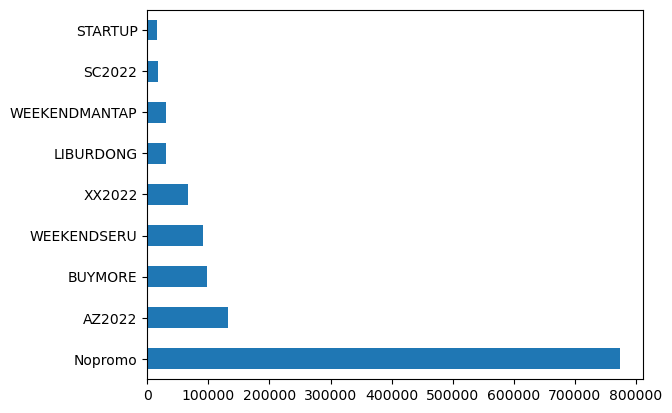

In [18]:
transaction_new.promo_code.value_counts().plot.barh()

🅱️ promo_code를 적용하지 않은 경우가 훨씬 많다.

#### shipment_fee

<AxesSubplot:xlabel='shipment_fee'>

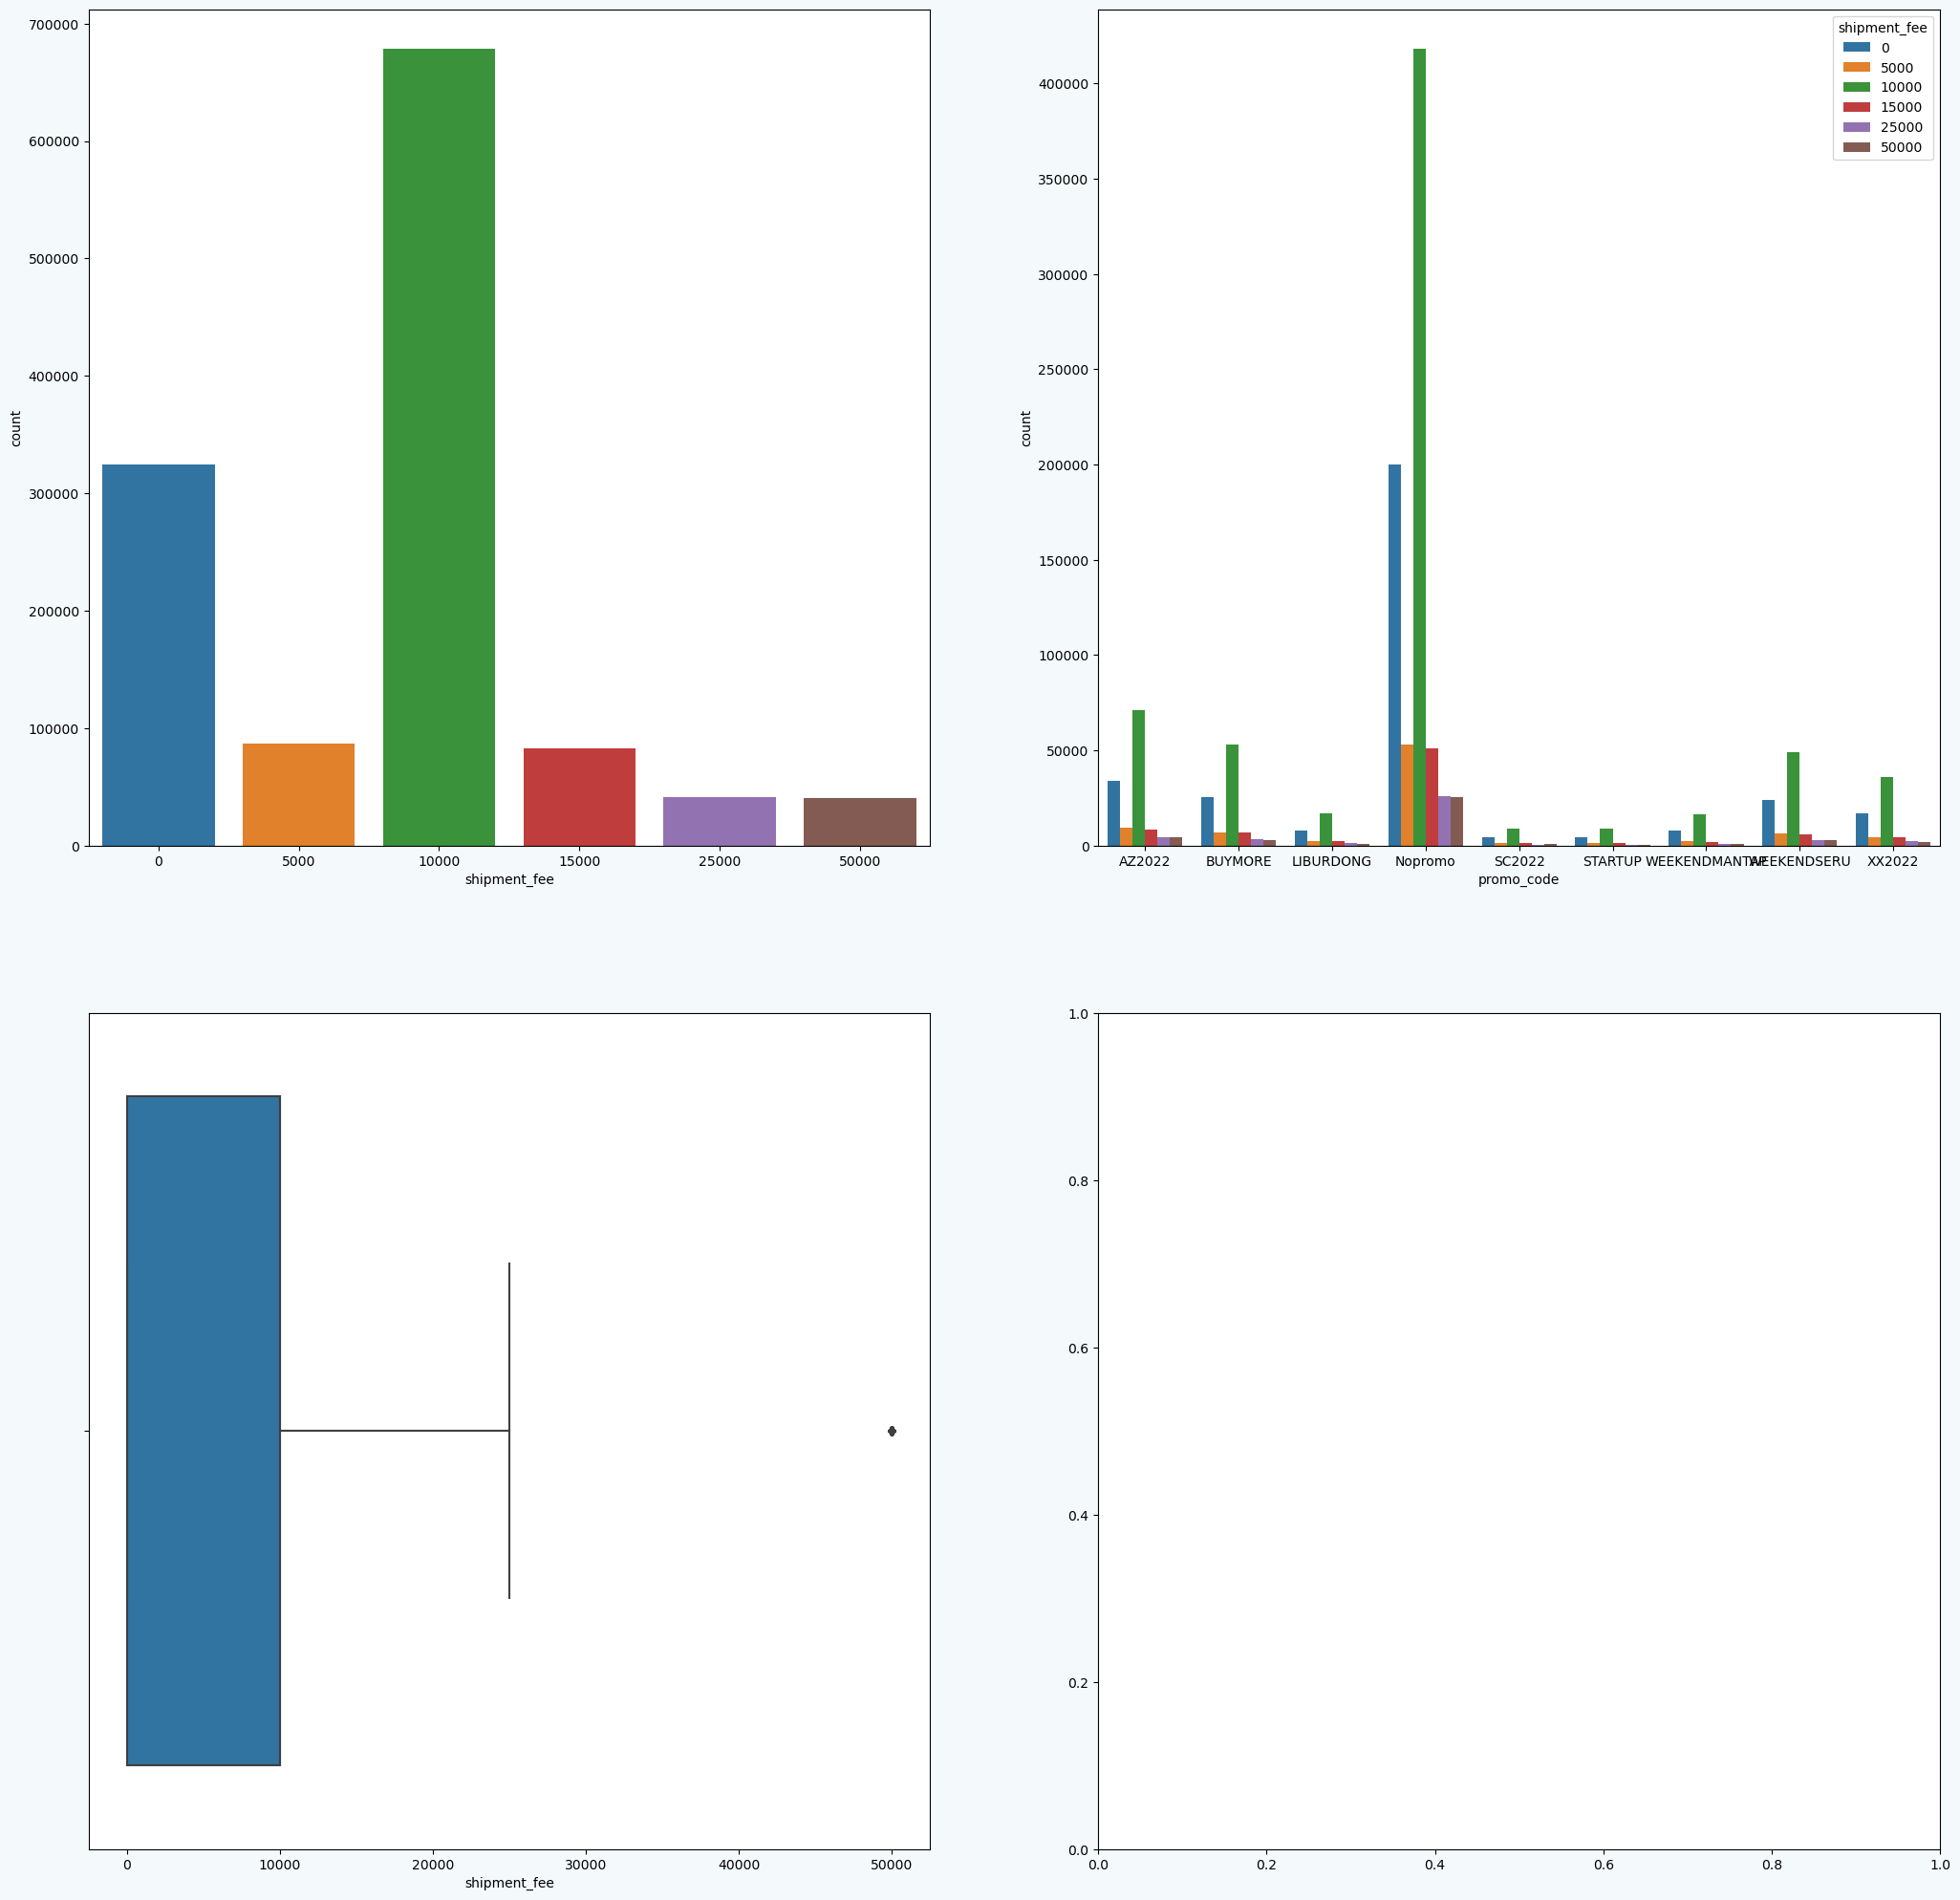

In [19]:
fig, axes = plt.subplots(2,2, figsize=(25, 25), facecolor='#F4F9FC')

# 배송비 분포
sns.countplot(data=transaction_new, x='shipment_fee', ax=axes[0,0])


# 프로모션별 배송비 분포
sns.countplot(data=transaction_new, x='promo_code',hue='shipment_fee', ax=axes[0,1])

# 배송비 boxplot
sns.boxplot(data=transaction_new, x='shipment_fee', ax=axes[1,0])

🅱️ 배송비는 10000인 경우가 많고, 프로모션별 배송비를 조회했을때도 비슷한 추이를 보인다.

#### total_amount

<AxesSubplot:xlabel='total_amount'>

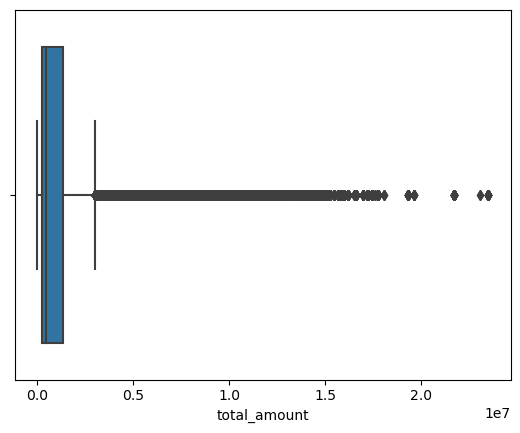

In [20]:
sns.boxplot(data=transaction_new, x='total_amount')

🅱️ 아웃라이어는 처리할 필요가 있어보임   
현재 1.5iqr 사용하여 아웃라이어 처리.   
-> 확인결과 아웃라이어를 제거해버리면 총합은 상관없지만 사용자가 어떤 물건을 샀는지 제대로 파악 X

#### quantity

<AxesSubplot:xlabel='quantity', ylabel='count'>

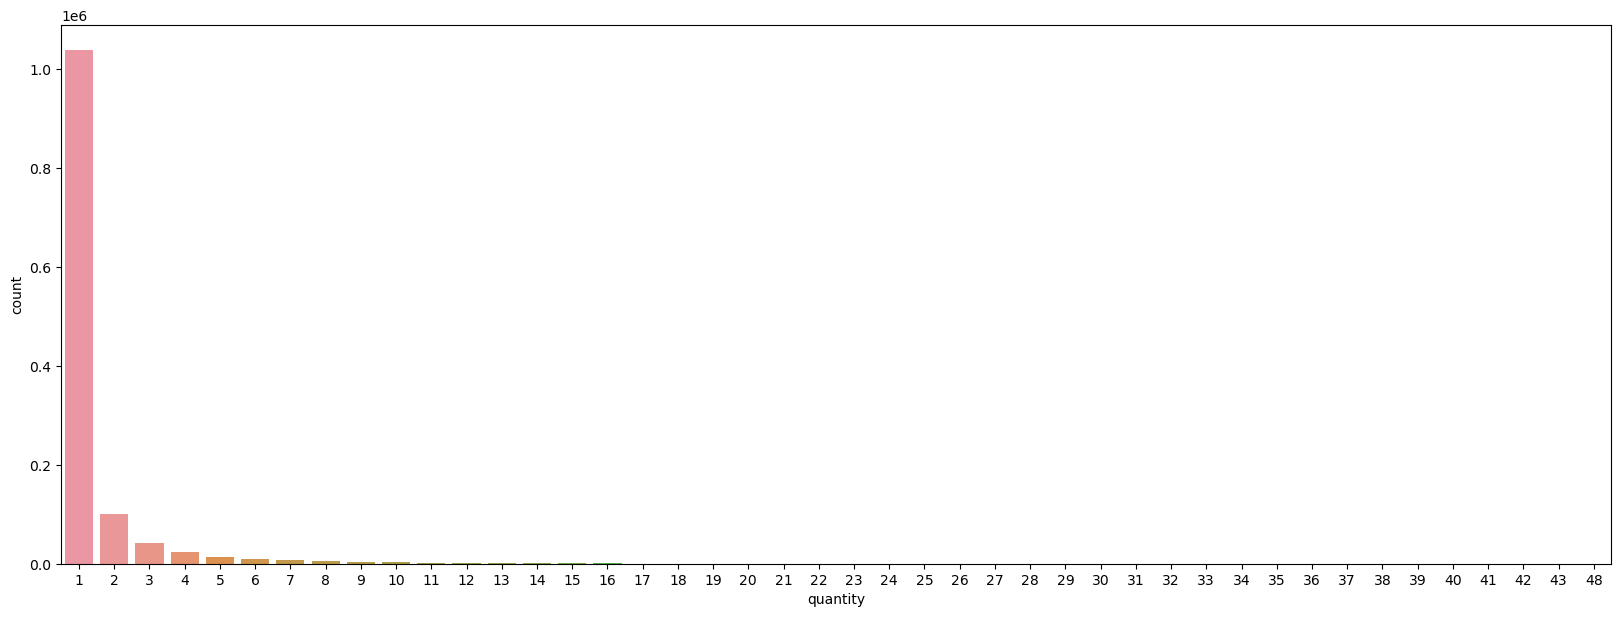

In [21]:
plt.subplots(figsize=(20,7))
sns.countplot(data=transaction_new, x='quantity')

In [22]:
transaction_new.quantity.value_counts(normalize=True)

1    0.83
2    0.08
3    0.03
4    0.02
5    0.01
6    0.01
7    0.01
8    0.00
9    0.00
10   0.00
11   0.00
12   0.00
13   0.00
14   0.00
15   0.00
16   0.00
17   0.00
18   0.00
19   0.00
20   0.00
21   0.00
22   0.00
23   0.00
24   0.00
25   0.00
26   0.00
27   0.00
29   0.00
28   0.00
33   0.00
31   0.00
32   0.00
34   0.00
36   0.00
40   0.00
35   0.00
38   0.00
41   0.00
30   0.00
39   0.00
37   0.00
48   0.00
42   0.00
43   0.00
Name: quantity, dtype: float64

🅱️ 1개 구매한 사람이 가장 많다. 어찌보면 당연한 것이다. 

#### item_price   

<AxesSubplot:xlabel='item_price'>

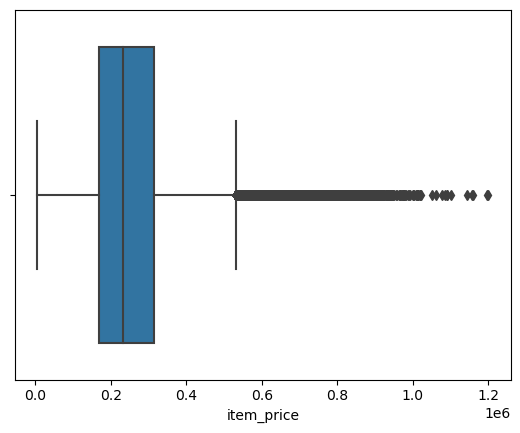

In [23]:
sns.boxplot(data=transaction_new, x='item_price')

In [24]:
transaction_new.item_price.describe()

count   1254585.00
mean     249974.44
std      111873.32
min        5600.00
25%      168373.00
50%      233540.00
75%      313647.00
max     1200357.00
Name: item_price, dtype: float64

🅱️ 아웃라이어는 처리할 필요가 있어보임   
마찬가지로 1.5iqr을 사용해서 아웃라이어 제거   
-> 확인결과 아웃라이어를 제거해버리면 총합은 상관없지만 사용자가 어떤 물건을 샀는지 제대로 파악 X

#### session_id       

🅱️ click_stream 데이터와 transaction 데이터를 조인한다면 transaction 데이터의 경우 대부분 구매를 한 경우에 해당되는 데이터만 있기때문에 만약 조인을 한다면 click_stream의 여러가지 세션들은 의미가 없어진다. 따라서 현재 session_id로만 봤을땐 유의미한 분석이 없을 것으로 판단하여 추후에 다른 방법으로 분석 예정

####  총정리

1. 프로모션에 따른 여러 컬럼들과의 관계에서 유의미한 것들을 찾지 못함.
1. transaction의 경우 구매한 경우가 96%, 비구매가 4%로 구매한 경우가 훨씬 많았음.
1. customer_id가 4774인 경우를 예시로 보면 각 행마다 모두 total_amount값이 같다. 즉 4774가 구매한 제품들을 행마다 입력되어 있고, total_amount은 모두 같은 값으로 기입되어 있다.
따라서 추후에 값에 대한 분석을 진행할 때 이점을 유의하여 분석해야함.

# 💡새로운 테이블 생성 (총정리 3번 내용을 반영하여 날짜별 고객별 구매정보 데이터 생성.)

In [26]:
transaction_new['shipment_period'] = transaction_new.shipment_date_limit-transaction_new.created_at

transaction_new.drop(columns=['shipment_location_lat','shipment_location_long'],axis=1,inplace=True)

transaction_new.loc[transaction_new['promo_code'].isnull(),'promo_code']='Nopromo'

In [27]:
transaction1 = transaction_new.groupby(['created_at','customer_id']).agg({'promo_amount':'max','shipment_fee':'max', 'total_amount':'max',
                                                                          'quantity':'sum','shipment_period':'max'}).sort_index(ascending=True).reset_index()
transaction2 = transaction_new[['created_at','customer_id','booking_id','session_id','total_amount', 'promo_code', 'payment_method', 'payment_status']].drop_duplicates()

In [28]:
transaction_final = pd.merge(transaction1,transaction2, on=['created_at','customer_id','total_amount'], how='left')
transaction_final['promo_yesno'] = transaction_final.promo_code.apply(lambda x:'x' if x=='Nopromo' else 'o')
transaction_final['created_at_2'] = transaction_final['created_at'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

In [5]:
# 고객데이터에서 성비
customer.gender.value_counts(normalize=True)

F   0.64
M   0.36
Name: gender, dtype: float64

In [41]:
# 새로 생성한 transaction데이터와 customer데이터 merge작업
# 구매를 한번도 안한 사람도 파악하기 위해서 customer쪽에 merge진행
tranfinal_cus = pd.merge(transaction_final,customer, on=['customer_id'],how='right')
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,NaN,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,NaN,8193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-08,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2020-08,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23


In [70]:
# 데이터 저장 & 불러오기
tranfinal_cus = pd.read_csv('data_file/tranfinal_cus.csv')

In [71]:
# 데이터타입 변환
columns_datetype_change(tranfinal_cus,'first_join_date','datetime64')
columns_datetype_change(tranfinal_cus,'birthdate','datetime64')
tranfinal_cus['join_date'] = tranfinal_cus['first_join_date'].dt.strftime('%Y-%m')
tranfinal_cus['join_month'] = tranfinal_cus['first_join_date'].dt.strftime('%m')
tranfinal_cus['join_day'] = tranfinal_cus['first_join_date'].dt.strftime('%d')
tranfinal_cus['join_year'] = tranfinal_cus['first_join_date'].dt.strftime('%Y')
tranfinal_cus.drop(columns=['first_name','last_name','username','email','device_id','device_version'],axis=1,inplace=True)
tranfinal_cus['created_at_3'] = pd.to_datetime(tranfinal_cus['created_at']).dt.strftime('%Y-%m-%d').astype('datetime64')
tranfinal_cus['가입 후 첫구매까지의 기간'] = (pd.to_datetime(tranfinal_cus['created_at']) - tranfinal_cus['first_join_date']).dt.days.fillna(-1)
from datetime import datetime
current_date = datetime.now().date()
tranfinal_cus['age'] = (current_date - tranfinal_cus['birthdate'].dt.date).dt.days // 365
tranfinal_cus['age2'] = tranfinal_cus['age'].apply(lambda x : (x // 10) *10)

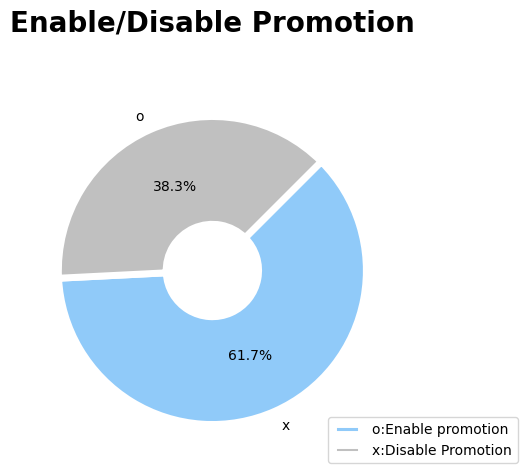

In [91]:
# 프로모션 적용여부에 따른 비율
plt.figure(figsize=(5,5),facecolor='white')
colors = ['#90CAF9','silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
tranfinal_cus.promo_yesno.value_counts(normalize=True).plot.pie(textprops={'size':10},colors=colors,wedgeprops=wedgeprops,autopct='%.1f%%',counterclock=False,startangle=45)
plt.title('Enable/Disable Promotion',fontsize=20,fontweight='bold',y=1.1)
plt.ylabel('')
plt.legend(['o:Enable promotion','x:Disable Promotion'],loc=[0.8,0]);

Text(0, 0.5, '')

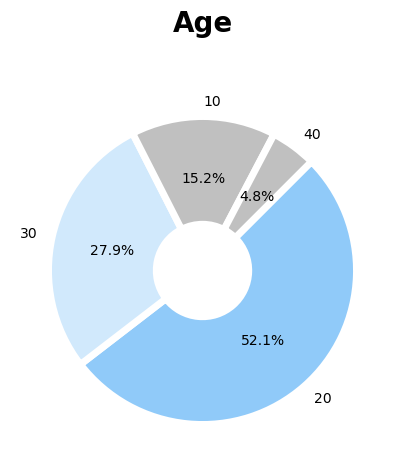

In [92]:
plt.figure(figsize=(5,5),facecolor='white')
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#90CAF9','#D1E9FC','silver','silver']
tranfinal_cus[(tranfinal_cus.age2<50) & (tranfinal_cus.age2>0)].age2.value_counts(normalize=True).plot.pie(textprops={'size':10},colors=colors,wedgeprops=wedgeprops,autopct='%.1f%%',counterclock=False,startangle=45)
plt.title('Age',fontsize=20,fontweight='bold',y=1.1)
plt.ylabel('')

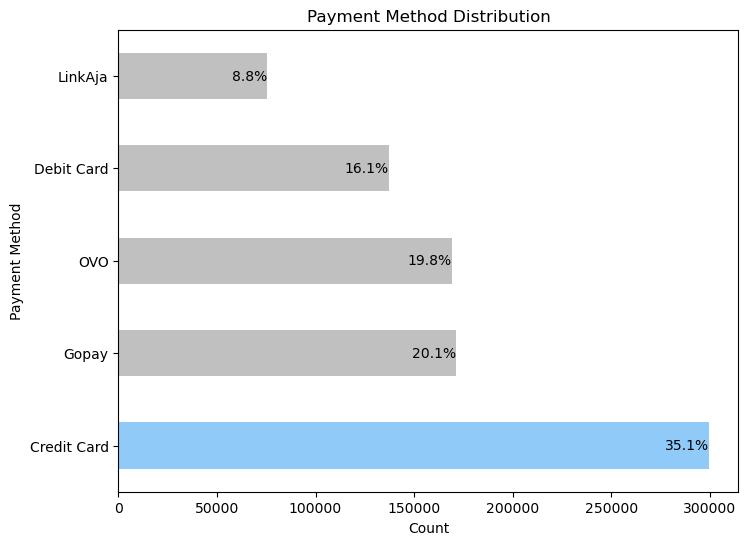

In [86]:
import matplotlib.pyplot as plt

payment_counts = tranfinal_cus.payment_method.value_counts()

# Find the index of the highest count
max_index = payment_counts.idxmax()

# Set different color for the highest count
colors = ['silver' if method != max_index else '#90CAF9' for method in payment_counts.index]

# Plot the horizontal bar chart with color customization
plt.figure(figsize=(8, 6))
payment_counts.plot.barh(color=colors)
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.title('Payment Method Distribution')

# Add percentage labels
total_count = payment_counts.sum()
for i, count in enumerate(payment_counts):
    percentage = count / total_count * 100
    plt.text(count, i, f'{percentage:.1f}%', ha='right', va='center')

plt.show()

In [48]:
product =  pd.read_csv('data_file/product.csv',on_bad_lines='skip')

In [54]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt


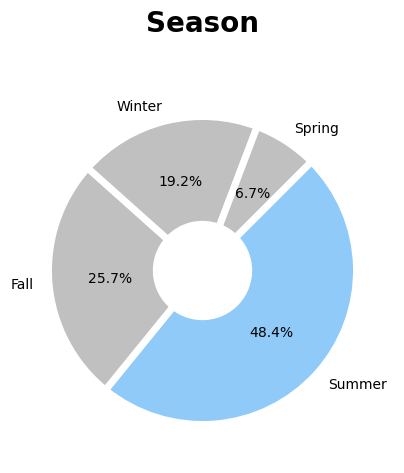

In [89]:
plt.figure(figsize=(5,5),facecolor='white')
colors = ['#90CAF9','silver','silver','silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
product.season.value_counts(normalize=True).plot.pie(textprops={'size':10},colors=colors,wedgeprops=wedgeprops,autopct='%.1f%%',counterclock=False,startangle=45)
plt.title('Season',fontsize=20,fontweight='bold',y=1.1)
plt.ylabel('');

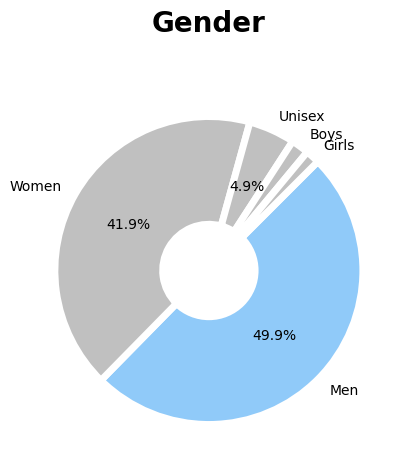

In [90]:
plt.figure(figsize=(5,5),facecolor='white')
# colors = ['#FF8A65','#BCAAA4','#BDBDBD','#FFF59D']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#90CAF9','silver','silver','silver','silver']
def my_autopct(pct):
    return f'{pct:.1f}%' if pct >= 4 else ''
product.gender.value_counts(normalize=True).plot.pie(textprops={'size':10},colors=colors,wedgeprops=wedgeprops,autopct=my_autopct,counterclock=False,startangle=45)
plt.title('Gender',fontsize=20,fontweight='bold',y=1.1)
plt.ylabel('');

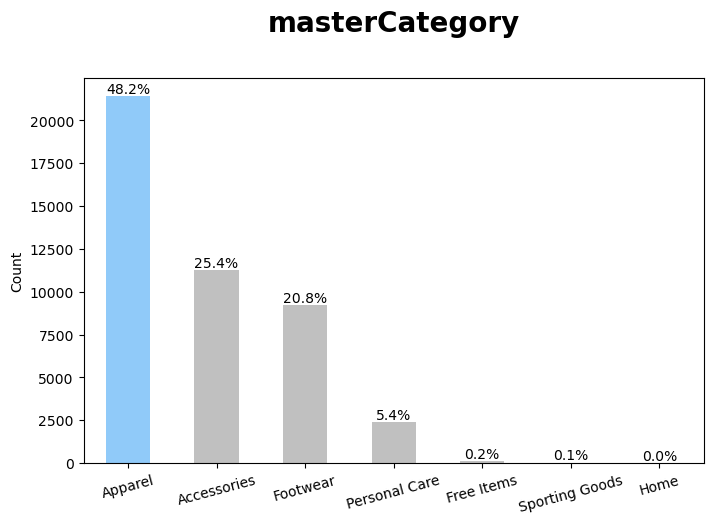

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), facecolor='white')

subCategory_counts = product.masterCategory.value_counts()

colors = ['#90CAF9'] + ['silver'] * 8

subCategory_counts.plot.bar(color=colors)
plt.title('masterCategory', fontsize=20, fontweight='bold', y=1.1)
plt.xticks(rotation=15)
plt.ylabel('Count')
total_count = subCategory_counts.sum()
for i, count in enumerate(subCategory_counts):
    percentage = count / total_count * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')


plt.show()

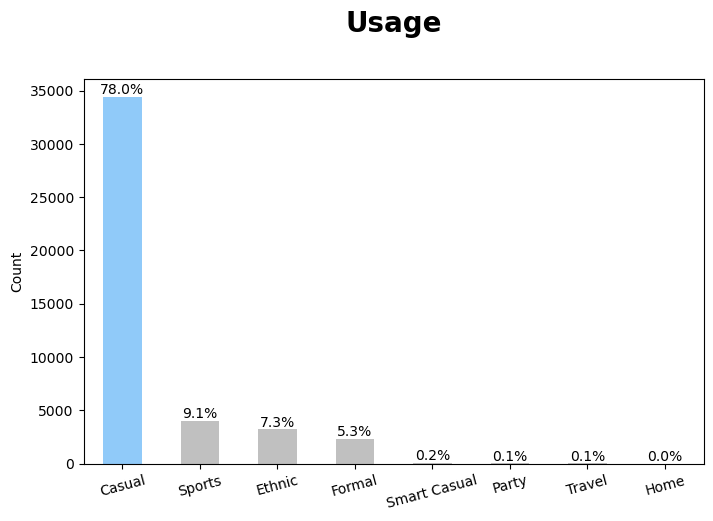

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), facecolor='white')

usage_counts = product.usage.value_counts()

colors = ['#90CAF9'] + ['silver'] * 8

usage_counts.plot.bar(color=colors)
plt.title('Usage', fontsize=20, fontweight='bold', y=1.1)
plt.xticks(rotation=15)
plt.ylabel('Count')

total_count = usage_counts.sum()
for i, count in enumerate(usage_counts):
    percentage = count / total_count * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

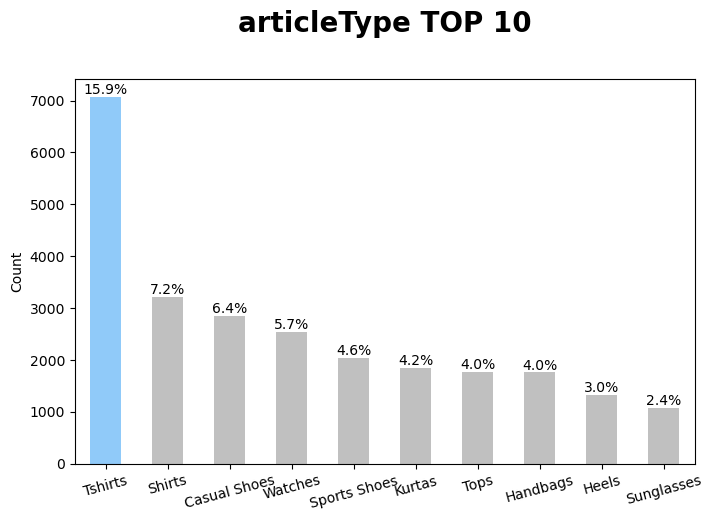

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), facecolor='white')

articleType_counts = product.articleType.value_counts().head(10)

colors = ['#90CAF9'] + ['silver'] * 9

articleType_counts.plot.bar(color=colors)
plt.title('articleType TOP 10', fontsize=20, fontweight='bold', y=1.1)
plt.xticks(rotation=15)
plt.ylabel('Count')
articleType_counts = product.articleType.value_counts()
total_count = articleType_counts.sum()
for i, count in enumerate(articleType_counts):
    percentage = count / total_count * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
    if i==9:
        break

plt.show()

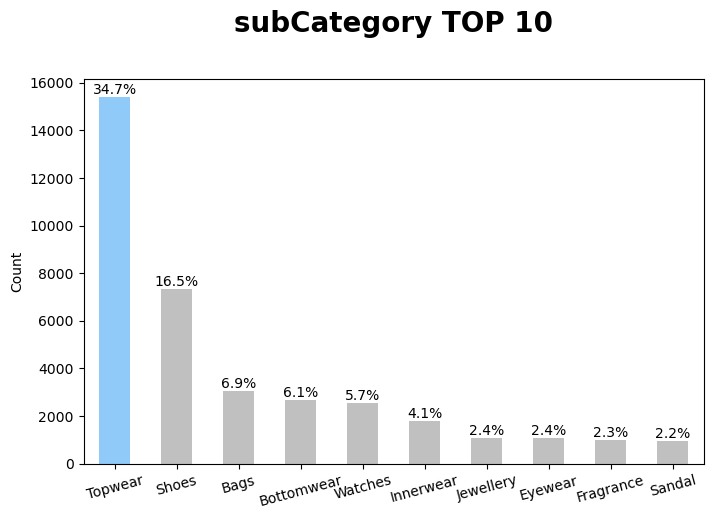

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), facecolor='white')

articleType_counts = product.subCategory.value_counts().head(10)

colors = ['#90CAF9'] + ['silver'] * 9

articleType_counts.plot.bar(color=colors)
plt.title('subCategory TOP 10', fontsize=20, fontweight='bold', y=1.1)
plt.xticks(rotation=15)
plt.ylabel('Count')
articleType_counts = product.subCategory.value_counts()
total_count = articleType_counts.sum()
for i, count in enumerate(articleType_counts):
    percentage = count / total_count * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
    if i==9:
        break

plt.show()

In [7]:
# 최근 2년 기준으로 다 알아보기
tranfinal_cus = tranfinal_cus[tranfinal_cus.created_at.notnull()]
tranfinal_cus['created_at'] = pd.to_datetime(tranfinal_cus['created_at'])  # 데이터 타입을 datetime으로 변환
tranfinal_cus['created_at_3'] = tranfinal_cus['created_at'].dt.strftime('%Y-%m-%d')
tranfinal_cus = tranfinal_cus[tranfinal_cus.created_at_3 > '2020-08-01']
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,gender,birthdate,device_type,first_join_date,join_date,join_month,join_day,join_year,created_at_3,가입 후 첫구매까지의 기간,age,age2
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-08,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-08-23,0.00,34,30
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2020-08,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-08-31,8.00,34,30
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2020-09,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-09-08,16.00,34,30
5,2020-09-16 13:48:09,7279,0.00,10000.00,412502.00,2.00,3 days 08:50:35,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Nopromo,Debit Card,Success,x,2020-09,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-09-16,24.00,34,30
6,2020-09-24 13:32:03,7279,0.00,10000.00,406435.00,2.00,2 days 07:12:13,1a9d2de2-8c8c-43f3-8ccb-9fbba08ea6e1,a083d201-314b-4b5d-9b12-0f2b6010846d,Nopromo,LinkAja,Failed,x,2020-09,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-09-24,32.00,34,30


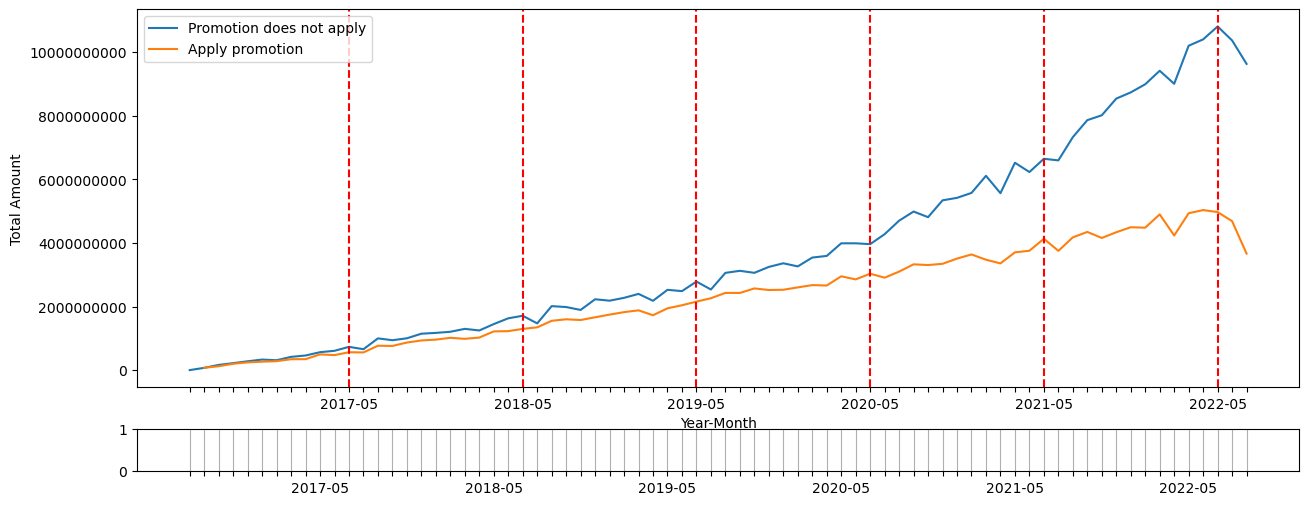

In [28]:
# 날짜별 프로모션 적용여부에 따른 매출
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 6))

# GridSpec을 사용하여 그래프와 실눈을 함께 그리기
gs = gridspec.GridSpec(2, 1, height_ratios=[0.9, 0.1])
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax)

tmp = tranfinal_cus[tranfinal_cus.payment_status=='Success']
tran_success_g = tmp.groupby(['created_at_2', 'promo_yesno'])['total_amount'].sum().reset_index()
sns.lineplot(data=tran_success_g, x='created_at_2', y='total_amount', hue='promo_yesno', ax=ax)

# x축 레이블 변경
xticklabels = tran_success_g['created_at_2'].unique()
x_values = [label if label.endswith('-05') else '' for label in xticklabels]
plt.xticks(range(len(xticklabels)), x_values, ha='right')
ax.set_xlabel('Year-Month')

# y축 값 포맷 변경
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylabel('Total Amount')

# 6월에 해당하는 부분에 선 추가
for i, label in enumerate(xticklabels):
    if label.endswith('-05'):
        ax.axvline(i, color='red', linestyle='--')

# 실눈 설정
ax2.grid(True, axis='x')

# 범례 수정
ax.legend(['Promotion does not apply', 'Apply promotion'], loc='upper left')

plt.show()


In [54]:
tmp1=tmp.groupby(['created_at_2'])['total_amount'].sum().reset_index()
tmp1['amount_difference'] = (tmp1['total_amount'].diff().shift(-1))
tmp1['percent'] = (tmp1['amount_difference']/tmp1['total_amount']*100).shift()
tmp1['percent'].min()

-11.674110862478058

In [49]:
(15776684223.00-15051883083.00)/15776684223.00

0.04594128460423581

In [41]:
((9629733539.00+3664976026.00)-(4970217464.00+10806466759.00))/(4970217464.00+10806466759.00)   # 전체 매출에서 5월대비 7월 매출 감소율 15%

-0.15731915673267133

In [34]:
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,gender,birthdate,device_type,first_join_date,join_date,join_month,join_day,join_year,created_at_3,가입 후 첫구매까지의 기간,age,age2
0,NaN,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,1996-06-14,iOS,2019-07-21,2019-07,07,21,2019,NaT,-1.00,27,20
1,NaN,8193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,1993-08-16,Android,2017-07-16,2017-07,07,16,2017,NaT,-1.00,29,20
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-08,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-08-23,0.00,34,30
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2020-08,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-08-31,8.00,34,30
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2020-09,M,1989-01-23,iOS,2020-08-23,2020-08,08,23,2020,2020-09-08,16.00,34,30


In [1]:
tmp = tranfinal_cus[tranfinal_cus.payment_status == 'Success'].groupby(['created_at_2', 'promo_yesno'])['total_amount'].sum().reset_index()

plt.figure(figsize=(25, 6))
colors = {'o': '#90CAF9', 'x': 'silver'}

sns.barplot(data=tmp, x='created_at_2', y='total_amount', hue='promo_yesno', palette=colors)

# Filter and format x-axis labels
xticklabels = tmp['created_at_2'].unique()
x_values = [label if label.endswith('-05') else '' for label in xticklabels]
x_positions = range(len(xticklabels))
plt.xticks(x_positions, x_values, rotation=0, ha='right')

plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Scatter Plot: Total Amount vs Created At')

# Display y-axis labels as actual numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


NameError: name 'tranfinal_cus' is not defined

In [12]:
(15051883083.00-13294709565)/15051883083.00*100

11.674110862478058

In [60]:
tranfinal_cus.promo_amount.describe()

count   852584.00
mean      2042.08
std       3063.48
min          0.00
25%          0.00
50%          0.00
75%       3993.00
max      24519.00
Name: promo_amount, dtype: float64

<AxesSubplot:xlabel='shipment_fee', ylabel='total_amount'>

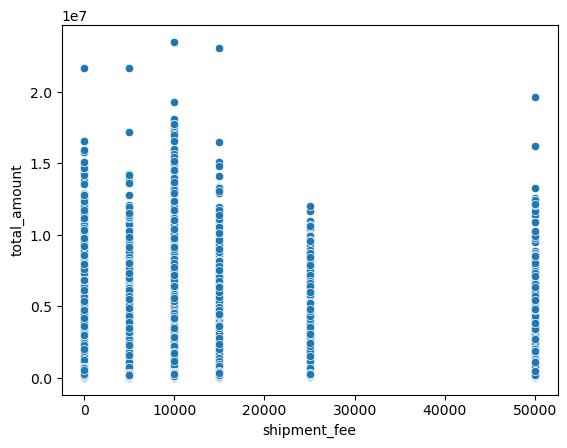

In [62]:
sns.scatterplot(data=tranfinal_cus, x='shipment_fee',y='total_amount')

In [72]:
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,gender,birthdate,device_type,home_location_lat,home_location_long,home_location,home_country,first_join_date,join_date,join_month,join_day,join_year,created_at_3,가입 후 첫구매까지의 기간,age,age2
0,NaN,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,1996-06-14,iOS,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21,2019-07,07,21,2019,NaT,-1.00,27,20
1,NaN,8193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,1993-08-16,Android,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16,2017-07,07,16,2017,NaT,-1.00,29,20
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-08,M,1989-01-23,iOS,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08,08,23,2020,2020-08-23,0.00,34,30
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2020-08,M,1989-01-23,iOS,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08,08,23,2020,2020-08-31,8.00,34,30
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2020-09,M,1989-01-23,iOS,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08,08,23,2020,2020-09-08,16.00,34,30


In [80]:
tranfinal_cus.promo_amount.value_counts(normalize=True)

0.00       0.62
4645.00    0.00
4284.00    0.00
4573.00    0.00
3752.00    0.00
4784.00    0.00
3764.00    0.00
3923.00    0.00
3400.00    0.00
3355.00    0.00
3753.00    0.00
4444.00    0.00
5084.00    0.00
3784.00    0.00
4303.00    0.00
4183.00    0.00
4577.00    0.00
4813.00    0.00
3524.00    0.00
3849.00    0.00
3152.00    0.00
3434.00    0.00
4615.00    0.00
4085.00    0.00
3176.00    0.00
3930.00    0.00
4257.00    0.00
3731.00    0.00
3734.00    0.00
4780.00    0.00
4479.00    0.00
4557.00    0.00
2968.00    0.00
3142.00    0.00
4903.00    0.00
3953.00    0.00
4452.00    0.00
3299.00    0.00
4644.00    0.00
4104.00    0.00
4144.00    0.00
3786.00    0.00
4055.00    0.00
3266.00    0.00
3832.00    0.00
5706.00    0.00
5205.00    0.00
2991.00    0.00
4524.00    0.00
4187.00    0.00
4819.00    0.00
4610.00    0.00
4405.00    0.00
3352.00    0.00
4245.00    0.00
3771.00    0.00
3449.00    0.00
4208.00    0.00
3898.00    0.00
4077.00    0.00
4352.00    0.00
4053.00    0.00
4037.00 

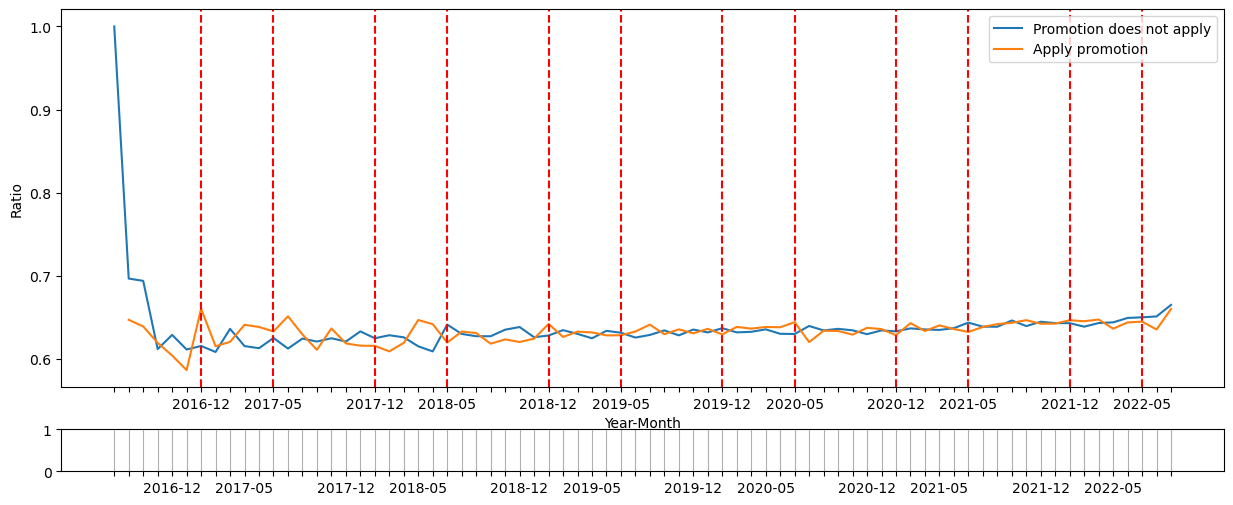

In [11]:
plt.figure(figsize=(15, 6))

# GridSpec을 사용하여 그래프와 실눈을 함께 그리기
gs = gridspec.GridSpec(2, 1, height_ratios=[0.9, 0.1])
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax)

# 날짜별 프로모션 적용 여부에 따른 남녀 비율 구하기
tran_success_g = tranfinal_cus.groupby(['created_at_2', 'promo_yesno', 'gender'])['gender'].count().unstack().reset_index()
tran_success_g['Total'] = tran_success_g[['F', 'M']].sum(axis=1)
tran_success_g['Female Ratio'] = tran_success_g['F'] / tran_success_g['Total']
tran_success_g['Male Ratio'] = tran_success_g['M'] / tran_success_g['Total']

# 날짜별 프로모션 적용 여부에 따른 여성 비율 그래프 그리기
sns.lineplot(data=tran_success_g, x='created_at_2', y='Female Ratio', hue='promo_yesno', ax=ax)


# x축 레이블 변경
xticklabels = tran_success_g['created_at_2'].unique()
x_values = [label if label.endswith('-12') or label.endswith('-05')  else '' for label in xticklabels]
plt.xticks(range(len(xticklabels)), x_values, ha='right')

ax.set_xlabel('Year-Month')

# y축 값 포맷 변경
ax.set_ylabel('Ratio')

# 6월에 해당하는 부분에 선 추가
for i, label in enumerate(xticklabels):
    if label.endswith('-12') or label.endswith('-05'):
        ax.axvline(i, color='red', linestyle='--')

# 실눈 설정
ax2.grid(True, axis='x')

# 범례 수정
ax.legend(['Promotion does not apply', 'Apply promotion'], loc='best')

plt.show()

# 여성 기준의 그래프이고, 반대가 남자.

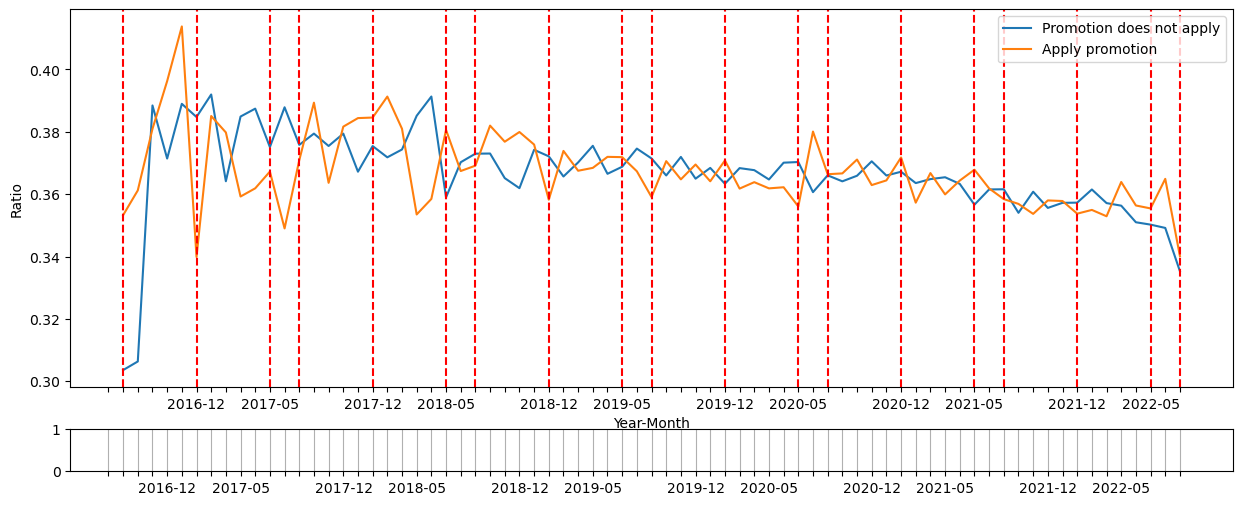

In [12]:
plt.figure(figsize=(15, 6))

# GridSpec을 사용하여 그래프와 실눈을 함께 그리기
gs = gridspec.GridSpec(2, 1, height_ratios=[0.9, 0.1])
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax)

# 날짜별 프로모션 적용 여부에 따른 남녀 비율 구하기
tran_success_g = tranfinal_cus.groupby(['created_at_2', 'promo_yesno', 'gender'])['gender'].count().unstack().reset_index()
tran_success_g['Total'] = tran_success_g[['F', 'M']].sum(axis=1)
tran_success_g['Female Ratio'] = tran_success_g['F'] / tran_success_g['Total']
tran_success_g['Male Ratio'] = tran_success_g['M'] / tran_success_g['Total']

# 날짜별 프로모션 적용 여부에 따른 여성 비율 그래프 그리기
sns.lineplot(data=tran_success_g, x='created_at_2', y='Male Ratio', hue='promo_yesno', ax=ax)


# x축 레이블 변경
xticklabels = tran_success_g['created_at_2'].unique()
x_values = [label if label.endswith('-12') or label.endswith('-05') else '' for label in xticklabels]
plt.xticks(range(len(xticklabels)), x_values, ha='right')

ax.set_xlabel('Year-Month')

# y축 값 포맷 변경
ax.set_ylabel('Ratio')

# 6월에 해당하는 부분에 선 추가
for i, label in enumerate(xticklabels):
    if label.endswith('-12') or label.endswith('-05') or label.endswith('-07'):
        ax.axvline(i, color='red', linestyle='--')

# 실눈 설정
ax2.grid(True, axis='x')

# 범례 수정
ax.legend(['Promotion does not apply', 'Apply promotion'], loc='best')

plt.show()

In [13]:
# 주문을 성공한 경우 프로모션 적용. 비적용에 따른 남녀 비율
tranfinal_cus_notnull = tranfinal_cus[(tranfinal_cus.payment_status=='Success')].reset_index(drop=True)
tranfinal_cus_notnull_1 = tranfinal_cus_notnull[tranfinal_cus_notnull.promo_yesno=='o'].groupby(['created_at_2','gender']).count()['session_id'].reset_index()
tranfinal_cus_notnull_1_no = tranfinal_cus_notnull[tranfinal_cus_notnull.promo_yesno=='x'].groupby(['created_at_2','gender']).count()['booking_id'].reset_index()

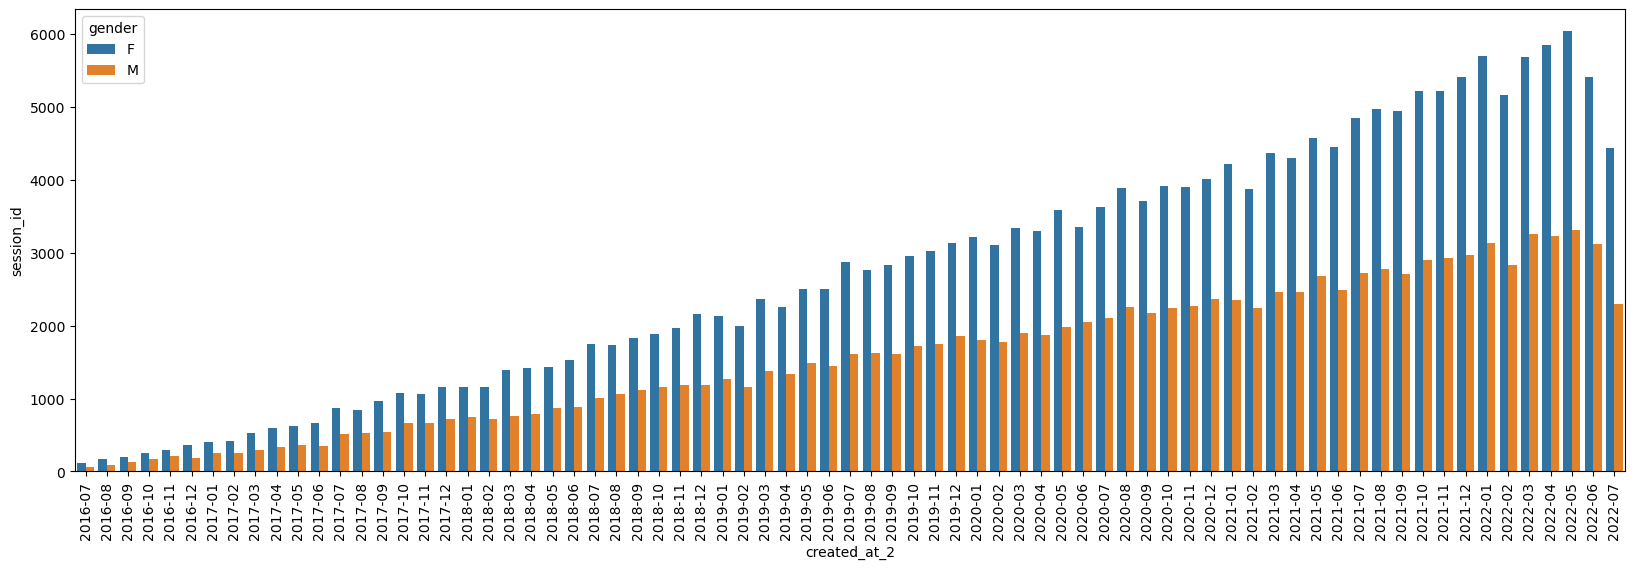

In [14]:
plt.figure(figsize=(20, 6))
sns.barplot(x=tranfinal_cus_notnull_1.created_at_2,y=tranfinal_cus_notnull_1.session_id,hue=tranfinal_cus_notnull_1.gender)
plt.xticks(rotation=90);

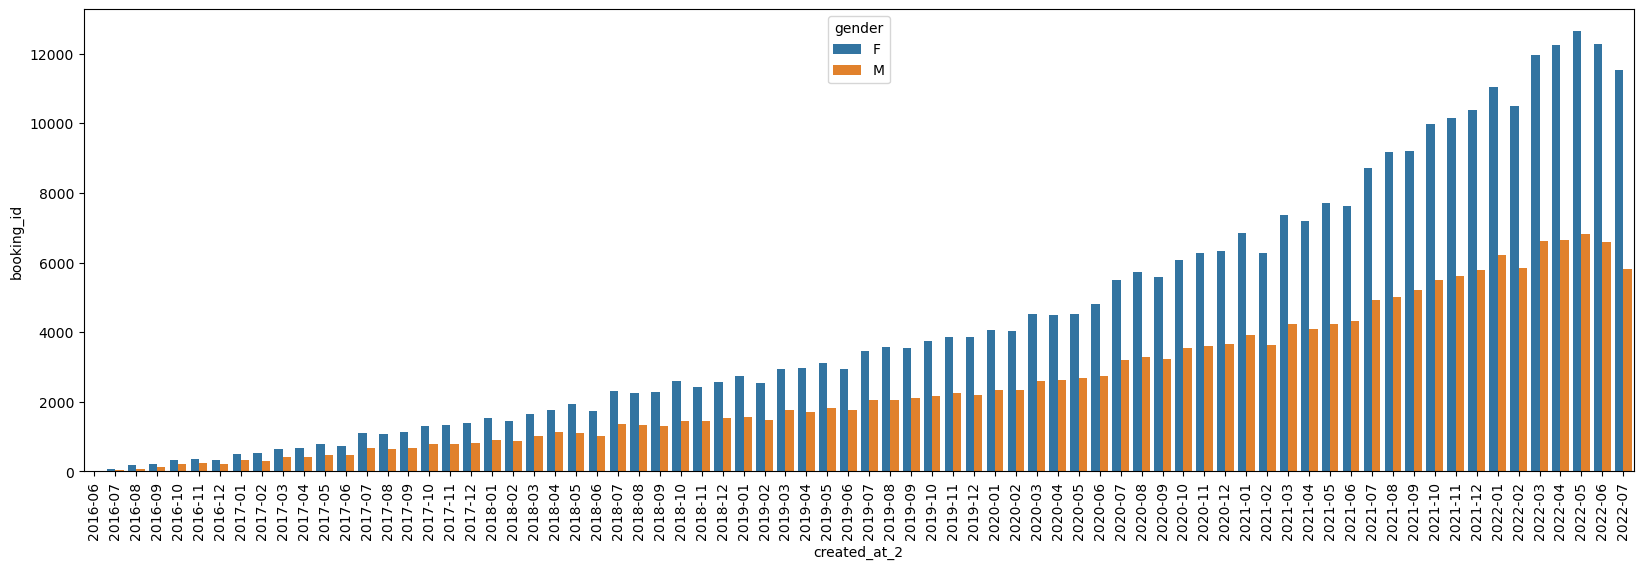

In [15]:
plt.figure(figsize=(20, 6))
sns.barplot(x=tranfinal_cus_notnull_1_no.created_at_2,y=tranfinal_cus_notnull_1_no.booking_id,hue=tranfinal_cus_notnull_1_no.gender)
plt.xticks(rotation=90);

Text(0, 0.5, '')

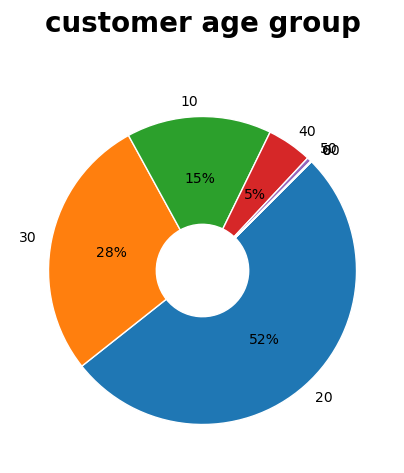

In [17]:
def auto(pct):
  return ( '%.0f%%' % pct) if pct>=3 else ''
plt.figure(figsize=(5,5),facecolor='white')
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
tranfinal_cus.age2.value_counts(normalize=True).plot.pie(textprops={'size':10},wedgeprops=wedgeprops,autopct=auto,counterclock=False,startangle=45)
plt.title('customer age group',fontsize=20,fontweight='bold',y=1.1)
plt.ylabel('')


findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.


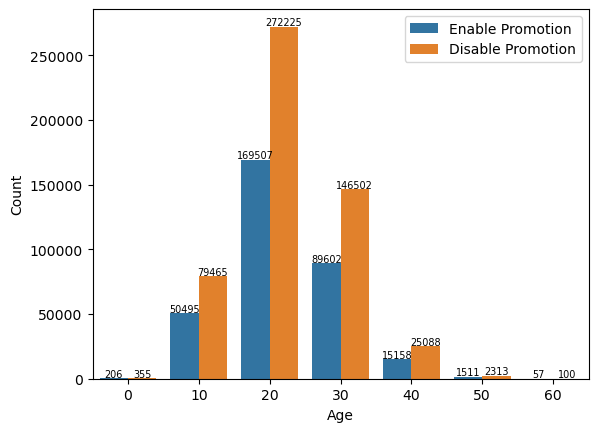

In [18]:
NA = sns.countplot(data=tranfinal_cus, x='age2',hue='promo_yesno')
plt.legend(['Enable Promotion','Disable Promotion'])
plt.xlabel('Age')
plt.ylabel('Count')
for patch in NA.patches:
    plt.text(x=patch.get_x() + patch.get_width()/2 ,y=patch.get_height() + len(tranfinal_cus)*0.001,s=patch.get_height(), ha='center',size=7)

In [8]:
tranfinal_cus_1 = tranfinal_cus[tranfinal_cus.created_at.notnull()].sort_values(['first_join_date','created_at'])
tranfinal_cus_1 = tranfinal_cus_1.groupby('customer_id').agg({
    'first_join_date': 'first',
    'created_at': 'first',
    'promo_yesno': 'first',
    'quantity': 'first',
    '가입 후 첫구매까지의 기간': 'first',
    'payment_status': [('payment_status_success', lambda x: (x == 'Success').sum()),
                       ('payment_status_fail', lambda x: (x == 'Failed').sum()),
                       'first']
                
}).reset_index()
tranfinal_cus_1.columns = [f'{x[0]}_{x[1]}' if x[1] != '' else x[0] for x in tranfinal_cus_1.columns]

# tmp = tranfinal_cus.groupby('customer_id').count()['session_id'].reset_index() 
tranfinal_cus_1.head()

,customer_id,first_join_date_first,created_at_first,promo_yesno_first,quantity_first,가입 후 첫구매까지의 기간_first,payment_status_payment_status_success,payment_status_payment_status_fail,payment_status_first
0,3,2018-08-25,2018-08-25 18:54:03,o,5.00,0.00,49,2,Success
1,8,2021-02-13,2021-02-13 09:47:39,o,1.00,0.00,7,0,Success
2,9,2021-06-26,2021-06-27 01:51:48,x,2.00,1.00,6,0,Success
3,11,2022-03-06,2022-03-07 14:29:13,o,1.00,1.00,1,0,Success
4,15,2019-09-28,2019-09-30 04:47:36,x,5.00,2.00,5,0,Success


In [9]:
tranfinal_cus_1['first_join_date_first2'] = tranfinal_cus_1['first_join_date_first'].dt.strftime('%Y-%m')

In [14]:

test1 = tranfinal_cus_1[(tranfinal_cus_1['가입 후 첫구매까지의 기간_first']==0)&(tranfinal_cus_1['payment_status_first']=='Success')]

In [18]:
# 신규가입자중 당일구매하는 비율
test1.shape[0]/customer.shape[0]

0.224

In [194]:
test2 = tranfinal_cus_1[(tranfinal_cus_1['payment_status_first']=='Success')]
test2['가입 후 첫구매까지의 기간_first'].value_counts()

0.00     22400
1.00     14958
2.00      5384
3.00      2652
4.00      1352
5.00       738
6.00       438
7.00       224
8.00       153
9.00        67
10.00       34
11.00       29
12.00       19
13.00       14
15.00        5
14.00        5
Name: 가입 후 첫구매까지의 기간_first, dtype: int64

findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.


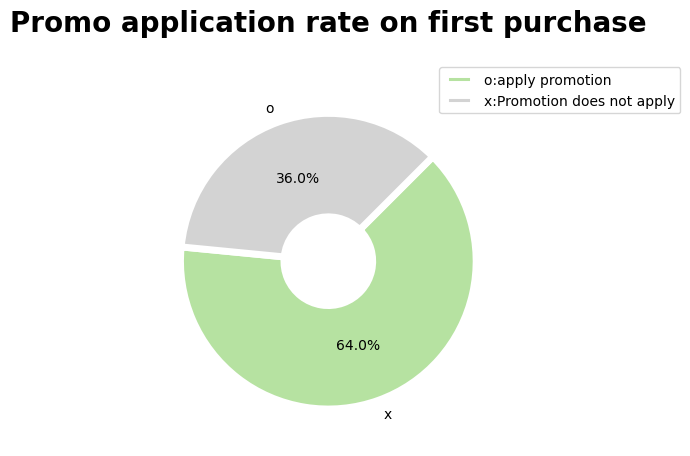

In [29]:
colors = [ '#B6E2A1','lightgrey']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Promo application rate on first purchase',fontsize=20,fontweight='bold',y=1.1)
test1.promo_yesno_first.value_counts().plot.pie(textprops={'size':10},colors=colors,wedgeprops=wedgeprops,autopct='%.1f%%',counterclock=False,startangle=45)
plt.ylabel('')
plt.legend(['o:apply promotion','x:Promotion does not apply'],loc=[0.8,0.9])

In [30]:
customer['first_join_date2'] = (customer['first_join_date'].astype('datetime64')).dt.strftime('%Y-%m')

In [33]:
n=customer.groupby('first_join_date2')['customer_id'].count().reset_index()
n.columns=['join_data1','count1']
m=test1.groupby(['first_join_date_first2'])['customer_id'].count().reset_index()
m.columns=['join_data2','count2']
n_m = pd.concat([n,m],axis=1)
n_m['percent'] = round(n_m['count2'] / n_m['count1'] * 100,0)
n_m.head()

,join_data1,count1,join_data2,count2,percent
0,2016-06,6,2016-06,1,17.00
1,2016-07,825,2016-07,141,17.00
2,2016-08,720,2016-08,185,26.00
3,2016-09,751,2016-09,188,25.00
4,2016-10,881,2016-10,248,28.00


In [34]:
n_m['count1'].sum()

100000

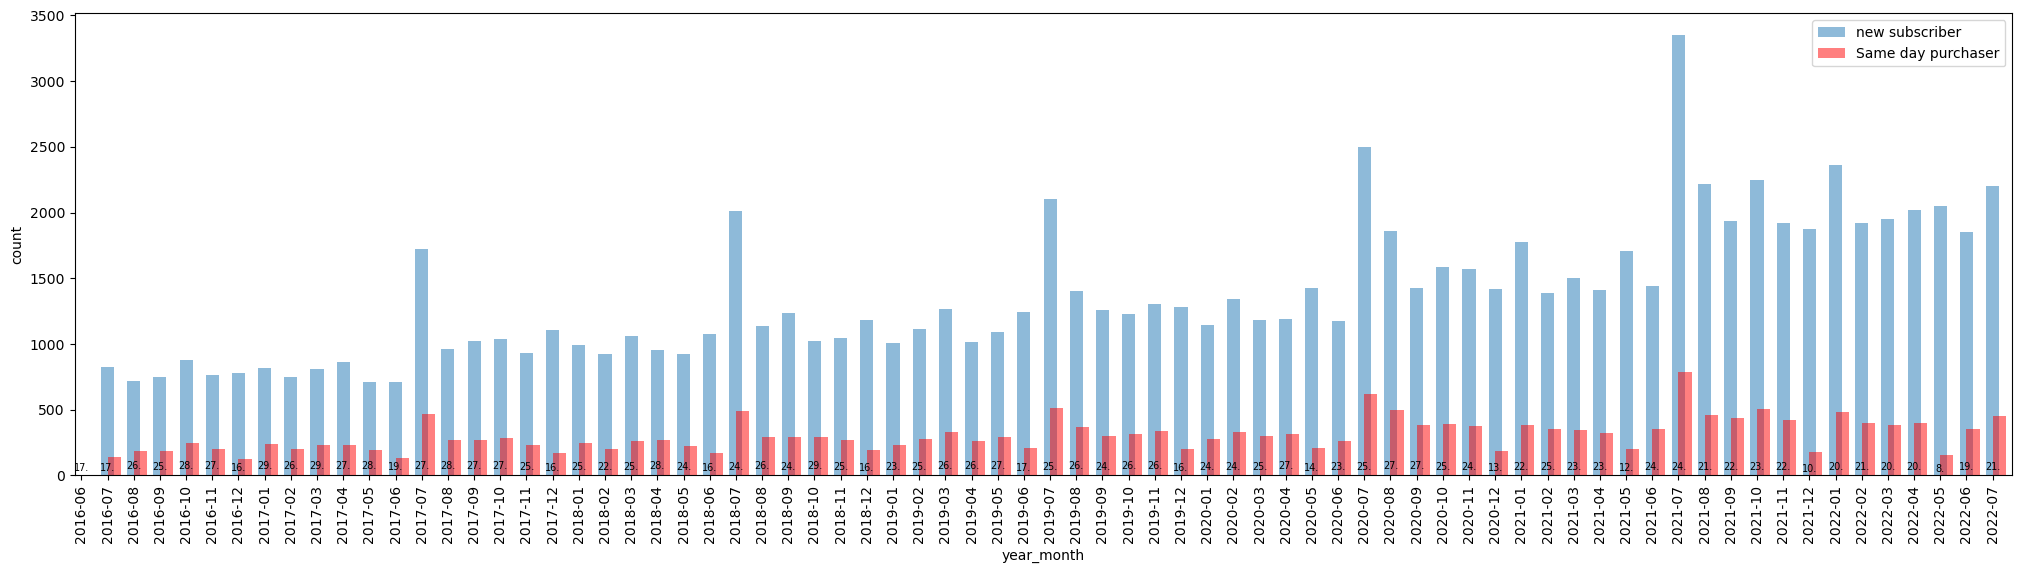

In [170]:
# 신규가입 후 당일구매한 고객
plt.figure(figsize=(25, 6))
customer.groupby('first_join_date2')['customer_id'].count().plot.bar(width=0.5, align='center', alpha=0.5)
test1.groupby(['first_join_date_first2'])['customer_id'].count().plot.bar(width=0.5, align='edge', alpha=0.5,color='r')

plt.legend(['new subscriber','Same day purchaser'])
plt.ylabel('count')
plt.xlabel('year_month')
for i, j in enumerate(n_m['percent']):
    plt.text(i, j + 5, f'{j:.0f}.', ha='center', va='bottom', size=7)

In [171]:
(27+24+25+25+21)/5

24.4

In [181]:
100000 - tranfinal_cus_1.shape[0]

49295

In [26]:
for i in range(0,20):
    print(f'신규가입 {i}일차 : ',
    tranfinal_cus_1[(tranfinal_cus_1['가입 후 첫구매까지의 기간_first']==i)&(tranfinal_cus_1.payment_status_first=='Success')].shape[0],
    '명, ',
    round(tranfinal_cus_1[(tranfinal_cus_1['가입 후 첫구매까지의 기간_first']==i)&(tranfinal_cus_1.payment_status_first=='Success')].shape[0]/customer.shape[0]*100),'%')

신규가입 0일차 :  22400 명,  22 %
신규가입 1일차 :  14958 명,  15 %
신규가입 2일차 :  5384 명,  5 %
신규가입 3일차 :  2652 명,  3 %
신규가입 4일차 :  1352 명,  1 %
신규가입 5일차 :  738 명,  1 %
신규가입 6일차 :  438 명,  0 %
신규가입 7일차 :  224 명,  0 %
신규가입 8일차 :  153 명,  0 %
신규가입 9일차 :  67 명,  0 %
신규가입 10일차 :  34 명,  0 %
신규가입 11일차 :  29 명,  0 %
신규가입 12일차 :  19 명,  0 %
신규가입 13일차 :  14 명,  0 %
신규가입 14일차 :  5 명,  0 %
신규가입 15일차 :  5 명,  0 %
신규가입 16일차 :  0 명,  0 %
신규가입 17일차 :  0 명,  0 %
신규가입 18일차 :  0 명,  0 %
신규가입 19일차 :  0 명,  0 %


In [187]:
for i in range(0,10):
    print(f'신규가입 {i}일차 : ',tranfinal_cus_1[(tranfinal_cus_1['가입 후 첫구매까지의 기간_first']==i)].groupby(['promo_yesno_first'])['customer_id'].count())

신규가입 0일차 :  promo_yesno_first
o     8428
x    15009
Name: customer_id, dtype: int64
신규가입 1일차 :  promo_yesno_first
o     5629
x    10048
Name: customer_id, dtype: int64
신규가입 2일차 :  promo_yesno_first
o    1970
x    3645
Name: customer_id, dtype: int64
신규가입 3일차 :  promo_yesno_first
o    1009
x    1757
Name: customer_id, dtype: int64
신규가입 4일차 :  promo_yesno_first
o    516
x    892
Name: customer_id, dtype: int64
신규가입 5일차 :  promo_yesno_first
o    265
x    509
Name: customer_id, dtype: int64
신규가입 6일차 :  promo_yesno_first
o    161
x    290
Name: customer_id, dtype: int64
신규가입 7일차 :  promo_yesno_first
o     86
x    148
Name: customer_id, dtype: int64
신규가입 8일차 :  promo_yesno_first
o     57
x    102
Name: customer_id, dtype: int64
신규가입 9일차 :  promo_yesno_first
o    35
x    36
Name: customer_id, dtype: int64
